<a href="https://colab.research.google.com/github/Asap7772/StimuliNN/blob/master/ClassificationModel_2Dim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Setup (Import and Initialization)

In [0]:
import torchvision.models as models
import torch
import torch.nn as nn
import numpy as np
import tkinter
import matplotlib
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from importlib import reload
from PIL import Image
from bs4 import BeautifulSoup

In [0]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/classificationSet/'
files = ['spring10_new_synsets.txt' ,'spring10_urls.txt']
try:
  os.chdir(root_path)
except FileNotFoundError:
  pass
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ClassificationModel_2Dim.ipynb	fall11_urls.txt       output
ClassificationModel_3Dim.ipynb	HoverTest.ipynb       spring10_new_synsets.txt
classificationModel.ipynb	imagenet_classes.txt  spring10_urls.txt
fall11_new_synsets.txt		Images


# Install Imageset Urls

In [0]:
!wget https://web.archive.org/web/20190130005544/http://image-net.org/imagenet_data/urls/imagenet_fall11_urls.tgz
!tar -xvzf imagenet_fall11_urls.tgz

--2019-11-12 05:30:43--  https://web.archive.org/web/20190130005544/http://image-net.org/imagenet_data/urls/imagenet_fall11_urls.tgz
Resolving web.archive.org (web.archive.org)... 207.241.233.214
Connecting to web.archive.org (web.archive.org)|207.241.233.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘imagenet_fall11_urls.tgz’

imagenet_fall11_url     [    <=>             ] 334.07M  4.08MB/s    in 74s     

2019-11-12 05:32:08 (4.49 MB/s) - ‘imagenet_fall11_urls.tgz’ saved [350302759]

fall11_urls.txt


In [0]:
!wget http://www.image-net.org/archive/fall11_new_synsets.txt

In [0]:
!wget https://web.archive.org/web/20190130005544/http://image-net.org/imagenet_data/urls/imagenet_spring10_urls.tgz
!tar -xvzf imagenet_spring10_urls.tgz

In [0]:
!wget http://www.image-net.org/archive/spring10_new_synsets.txt

# Urls to images

In [0]:
!head -n 100 fall11_urls.txt
# !head -n 100 spring10_urls.txt

In [0]:
# !head -n 500 spring10_new_synsets.txt
# !head -n 500 fall11_new_synsets.txt
!pip install eventlet
!sudo apt-get -o Dpkg::Options::="--force-confmiss" install --reinstall netbase

In [0]:
import requests
from io import BytesIO
from PIL import Image
from socket import gethostbyname, gaierror
import eventlet

def loadImageUrls(path = 'spring10_urls.txt'):
  print(path)
  label, url, i = [],[], 0
  try:
    with open(path, 'r', encoding='utf-8',errors='ignore') as f:
      for line in f:
        if path == 'fall11_urls.txt' and i == 13073006:
          continue
        a= line.strip().split('	')
        if len(a) == 2:
          label.append(a[0].split('_')[0])
          url.append(a[1])
        else:
          #not valid url
          label.append(a[0].split('_')[0])
          url.append("invalidUrl") 
          # print('i =', i + 1) # line number is index + 1
          # print('a =', a)
        i += 1
    print(i)
  except UnicodeDecodeError as e:
    print('i =', i)
    print(e)
  return label, url

def translateKeys(lst, path = 'http://www.image-net.org/api/text/wordnet.synset.getwords?wnid='):
  setLabels = set(lst)
  dctLabel = {}
  for x in setLabels:
    dctLabel[x] = requests.get(path + x).text.strip()
  return dctLabel

def getURLImage(url):
    try:
      with eventlet.Timeout(10):
        response = requests.get(url)
      img = Image.open(BytesIO(response.content))
      img.load()
      return img
    except (gaierror, requests.exceptions.RequestException, OSError) as e:
      print(url, e)
      return None

classDict = {"People": ["n00007846"], "Animal": ["00004475"],"Plants": ["n00017222"], "Small Objects": [],"Large Objects": [], "Indoor Scenes": ["n08663703", "n07977870"], "Outdoor Scenes" : ['n04334599', 'n04335209']}

def getClassPictures(labels, urls, classification, imgs, maxNum = 1000):
  assert len(labels) == len(urls), 'has to be same length'
  assert classification in classDict, 'invalid class chosen'

  i = 0
  # avoid = (8591425, 8591609, 8591610, 8591787, 8592023, 8592024, 8592025, 8592026, 8592063, 8592064, 206323, 206408, 206858,206941, 7723081, 7723361 ,7723362, ) #spring 2010
  avoid = (10334716) #fall 2011
  found = False
  while i < len(urls):
    classNum = int(labels[i][1:])
    if (classification == 'Small Objects' and classNum >= 7557434):
      found = True
    if found or labels[i] in classDict[classification] and urls[i]:
      if i not in avoid:
        img = getURLImage(urls[i])
        if img != None:
          print(i, maxNum)
          imgs.append(img)
          maxNum -= 1
        if maxNum == 0:
          return imgs
    i += 1
  return imgs

In [0]:
labelsSpring, urlsSpring = loadImageUrls(path = 'spring10_urls.txt')
labelsFall, urlsFall = loadImageUrls(path = 'fall11_urls.txt')

spring10_urls.txt
11231732
fall11_urls.txt
13073006


In [0]:
imgs = []
getClassPictures(labelsFall, urlsFall, "Indoor Scenes", imgs)

In [0]:
print(len(imgs))
print(imgs[0])
#!mkdir Images/people
# !mkdir Images/plants
# !mkdir Images/small
# !mkdir Images/large
# !mkdir Images/outdoor
# !mkdir Images/indoor


def saveImagesToDir(arr, path = 'Images/indoor/', start = 1):
  for i in range(len(arr)):
    arr[i].convert('RGB').save(path + str(start + i) + ".jpg")

saveImagesToDir(imgs)

187
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=375x500 at 0x7FE49D060FD0>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


# Image Setup

In [0]:
from torchvision import transforms
from PIL import Image
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

## Helper Functions

In [0]:
def imagesFromFile(path, arr, start = 1, end=1000, ending = ".jpg"):
  print(path)
  for i in range(start, end+1):
    try:
      if i % 100 == 0:
        print(i)
      fp = Image.open(path + str(i) + ending)
      fp.load() #to close file
      arr.append(fp)
    except OSError as e:
      print(e)
      print(i)
      pass

In [0]:
allImages = []
images = imagesFromFile('/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/people/', allImages, end = 823)
images = imagesFromFile('/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/plants/', allImages, end = 651)
images = imagesFromFile('/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/small/', allImages, end = 1000)
images = imagesFromFile('/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/outdoor/', allImages, end = 1000)
images = imagesFromFile('/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/indoor/', allImages, end = 187) # need to find more
images = imagesFromFile('/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/large/', allImages, end = 0) # need to find 
print(len(allImages))

/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/people/
100
200
300
400
500
600
700
800
/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/plants/
100
200
300
400
500
600
/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/small/
100
200
300
400
500
600
700
800
900
1000
/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/outdoor/
100
200
300
400
500
600
700
800
900
1000
/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/indoor/
100
/content/gdrive/My Drive/Colab Notebooks/classificationSet/Images/large/
3661


(500, 334)

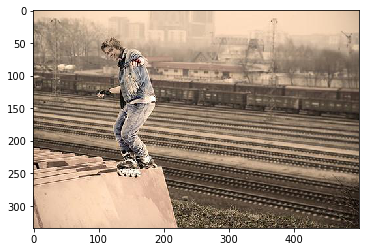

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
%matplotlib inline
imshow(np.asarray(allImages[0]))
allImages[0].size

## Images in the data set

In [0]:
def displayImages(images):
    i = 1
    reload(plt)
    %matplotlib inline
    plt.figure(figsize=(20,20))
    for im in images:
        ax = plt.subplot(23,10,i) #can change
        ax.imshow(np.asarray(im))
        ax.axis('off') 
        i += 1

## All Images

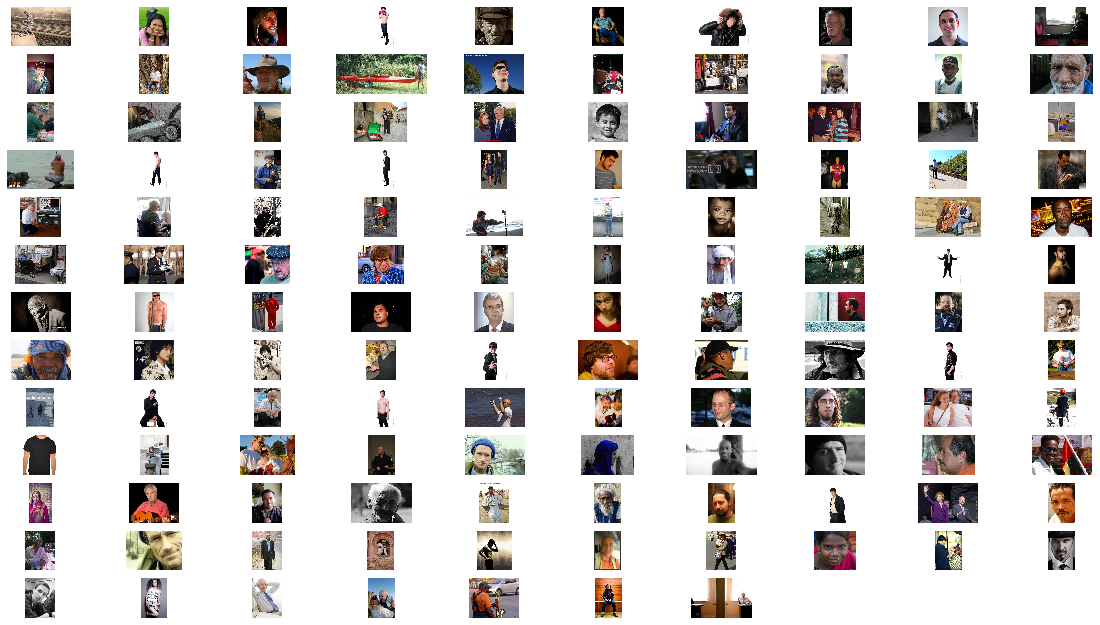

In [0]:
%matplotlib inline
displayImages(allImages)

# Truncation of neural net layers

In [0]:
batch_t = []
i = 0
for img in allImages:
  print(i)
  img_t = transform(img)
  batch_t.append(torch.unsqueeze(img_t, 0)) # batch_t is set of transformed image
  i += 1

In [0]:
model = models.alexnet(pretrained=True)

In [0]:
l = list(model.children())
layerNum = 10 #layer starts from 0
delete = len(l[0]) - layerNum -1 #number of truncating layers from the model
print("Layer:", layerNum)
print("Deleted", delete)
nn_trunc = nn.Sequential(*l[0][:len(l[0])-delete])
nn_trunc.eval()

Layer: 10
Deleted 2


Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

## Output of passing image to model

In [0]:
out = []
for i in range(len(allImages)):
    out.append(nn_trunc(batch_t[i]))
print(out[0].shape)
print(out[-1].shape)

torch.Size([1, 256, 13, 13])
torch.Size([1, 256, 13, 13])


## Reshaping output to 2 dims

In [0]:
arr = []
for i in range(len(allImages)):
    arr.append(out[i].view(1, out[i].shape[0]*out[i].shape[1]*out[i].shape[2]*out[i].shape[3]))

## Convert to numpy matrix

In [0]:
import numpy as np
x = arr[0].detach().numpy()
for nparr in arr[1:]:
    x = np.vstack([x, nparr.detach().numpy()])

# Dimension Reductionality

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## PCA

In [0]:
print(x.shape)
pca = PCA(n_components=50)
pca_result = pca.fit_transform(x)
print(pca_result.shape)

(3659, 43264)
(3659, 50)


## TSNE

In [0]:
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result)
print(tsne_pca_results.shape)

(3659, 2)


# Plotting Results from Dimensional Reductionality

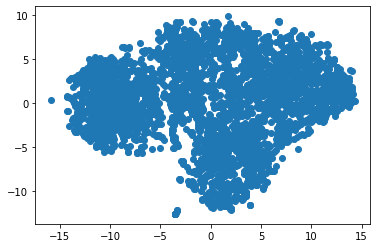

In [0]:
reload(plt)
fig= plt.figure()
ax = fig.add_subplot(111)
x,y = tsne_pca_results[:,0],tsne_pca_results[:,1]
ax.scatter(x,y)

# Saving Arrays to file

In [0]:
np.savetxt('/content/gdrive/My Drive/Colab Notebooks/classificationSet/output/tsne' + str(layerNum) + '.txt', tsne_pca_results, fmt='%d')

# K-Means Clustering and Plot

In [0]:
import plotly.io as pio
pio.renderers.default = "colab"
from sklearn.cluster import KMeans
from ipywidgets import Output, VBox
from IPython.display import HTML
import os
import torchvision.models as models
import torch
import torch.nn as nn
import numpy as np
import matplotlib
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from importlib import reload
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [0]:
def cluster_kmeans(layerToLoad, clusterNum):
  combined = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/classificationSet/output/tsne' + str(layerToLoad) + '.txt')
  kmeans_result = KMeans(n_clusters=clusterNum).fit_predict(combined)
  return kmeans_result, combined

def setup_cluster(layerToLoad, clusterNum=4):
  kmeans_result, combined = cluster_kmeans(layerToLoad, clusterNum)
  combined = np.insert(combined, 2, list(range(0,len(combined))), axis=1)

  arr = []
  for i in range(clusterNum):
    arr.append(combined[np.nonzero(kmeans_result == i)])
  
  for i in range(clusterNum):
    path = '/content/gdrive/My Drive/Colab Notebooks/classificationSet/output/cluster/' + str(i) + '_layer' + str(layerToLoad) + '_totClusters' + str(clusterNum) + '.txt'
    f = open(path, "w+")
    f.close()
    np.savetxt(path, arr[i])
  
  labels = ["Cluster " + str(i + 1) for i in range(clusterNum)]
  matplotlib2DScatter(arr,clusterNum, labels)

def plotFromFile(layerToLoad, clusterNum):
  arr = []
  for i in range(clusterNum):
    path = '/content/gdrive/My Drive/Colab Notebooks/classificationSet/output/cluster/' + str(i) + '_layer' + str(layerToLoad) + '_totClusters' + str(clusterNum) + '.txt'
    arr += [np.loadtxt(path)]
  labels = ["Cluster " + str(i + 1) for i in range(clusterNum)]
  matplotlib2DScatter(arr,clusterNum, labels,layer = layerToLoad)
  # plotly2DScatter(arr,clusterNum, labels)

def matplotlib2DScatter(arr, clusterNum, labels, colors = ['red', 'green', 'blue','orange','brown','grey','magenta','yellow','cyan'], layer = 3):
  plt.figure()
  for i in range(clusterNum):
    x,y = arr[i][:,0],arr[i][:,1]
    plt.scatter(x, y, c = colors[i])
  plt.legend(['cluster ' + str(i + 1) for i in range(clusterNum)])
  plt.title("AlexNet Truncated to Layer " + str(layer))
  plt.show();
    
def plotly2DScatter(arr, clusterNum, labels, colors = ['red', 'green', 'blue','orange', 'cyan', 'magenta', 'brown','grey','yellow'], opacity = .5):
  myfunc = lambda inum: "Image Num: " + str(int(inum))
  transform = lambda vec: list(np.vectorize(myfunc)(vec))
  
  scatter = []
  
  for i in range(clusterNum):
      x,y,num = arr[i][:,0],arr[i][:,1], transform(arr[i][:,2])
      scatter.append(go.Scatter(x=x, y=y, mode='markers',
                          marker=dict(color=colors[i],opacity=opacity), name=labels[i], hovertext=num, hoverinfo="text"))
  
  fig = go.FigureWidget(data=scatter)
  
  def update_point(trace, points, selector):
      print(points.point_inds)

  for i in range(clusterNum):
      fig.data[i].on_click(update_point)
  print("before plot")
  iplot(fig)
  print("after plot")

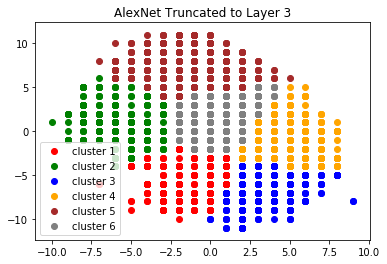

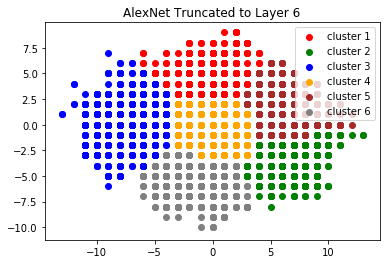

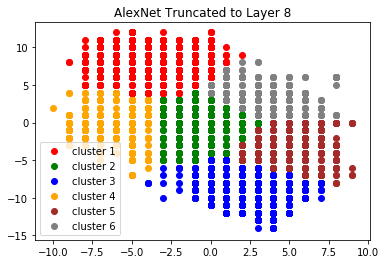

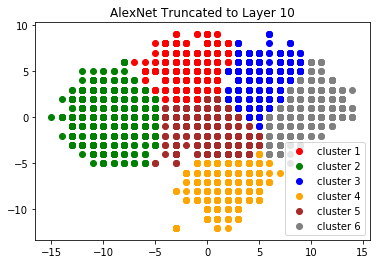

In [0]:
plotFromFile(3,6)
plotFromFile(6,6)
plotFromFile(8,6)
plotFromFile(10,6)

In [0]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [0]:
from pairing import pair, depair
# %matplotlib ipympl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plotImages(layerToLoad, clusterNum = 4, color = ['red', 'green', 'blue','orange', 'yellow', 'cyan', 'magenta', 'brown','grey']):

    a = np.loadtxt('/content/gdrive/My Drive/Colab Notebooks/classificationSet/output/tsne' + str(layerToLoad) + '.txt')

    opacity_level = 100 #between 0 and 255
    def getImage(path):
        try:
          b = allImages[path].copy()
          b.thumbnail((30, 30), Image.ANTIALIAS)
        except IndexError as e:
          print()
        b = b.convert("RGBA")
        datas = b.getdata()
        
        newData = []
        for item in datas:
            if item[0] == 0 and item[1] == 0 and item[2] == 0:
                newData.append((0, 0, 0, opacity_level))
            else:
                newData.append(item)
        b.putdata(newData)
        
        return OffsetImage(b)

    x = a.T[0]
    y = a.T[1]

    paths = list(range(len(x)))

    fig, axs = plt.subplots(ncols=4, nrows=2)
    
    gs = axs[1, 2].get_gridspec()
    
    for val in axs[:, :-1].flatten():
        val.remove()
    
    ax = fig.add_subplot(gs[:, :-1])
    ax2 = axs[0,-1]
    ax3 = axs[1,-1]
    
    set = []
    for i in range(clusterNum):
        path = '/content/gdrive/My Drive/Colab Notebooks/classificationSet/output/cluster/' + str(i) + '_layer' + str(layerToLoad) + '_totClusters' + str(clusterNum) + '.txt'
        set.append(np.loadtxt(path))

    cMap = {}
    i = 0
    for pSet in set:
        for val in pSet:
            cMap[pair(abs(val[0]),abs(val[1]))] = i
        i += 1
    
    ax.set_title("AlexNet Truncated to Layer " + str(layerToLoad))
    
    tolerance = 10 # points
    
    for i in range(clusterNum):
        ax.scatter(set[i][:,0], set[i][:,1], c=color[i], s=40, alpha=0.4, label='Cluster ' + str(i + 1), picker=tolerance)
    
    ax.legend()
    
    imgMap = {}
    for x0, y0, path in zip(x, y,paths):
        i = cMap[pair(abs(x0), abs(y0))]
        
        img = getImage(path)
        
        imgMap[pair(abs(x0), abs(y0))] = path
        
        if i == 0:
            ab = AnnotationBbox(img, (x0, y0), frameon=True, bboxprops =dict(boxstyle="round,pad=0", edgecolor='red'))
        elif i == 1:
            ab = AnnotationBbox(img, (x0, y0), frameon=True, bboxprops =dict(boxstyle="round,pad=0", edgecolor='green'))
        elif i == 2:
            ab = AnnotationBbox(img, (x0, y0), frameon=True, bboxprops =dict(boxstyle="round,pad=0", edgecolor='blue'))
        else:
            ab = AnnotationBbox(img, (x0, y0), frameon=True, bboxprops =dict(boxstyle="round,pad=0", edgecolor='cyan'))
        ab.set_alpha(.4)
        ab.zorder = 1
        ax.add_artist(ab)

    def on_pick(event):
        artist = event.artist
        xmouse, ymouse = event.mouseevent.xdata, event.mouseevent.ydata
        xy = event.artist.get_offsets()
        x,y = tuple(xy[event.ind][0])
        x,y = abs(x), abs(y)
        ax2.imshow(allImages[imgMap[pair(x,y)]])
        
    cid = fig.canvas.callbacks.connect('pick_event', on_pick)
    
    for i in range(clusterNum):
        ax3.scatter(set[i][:,0], set[i][:,1], c=color[i], s=40, alpha=0.4, label='Cluster ' + str(i + 1), picker=tolerance)
    
    fig.tight_layout()

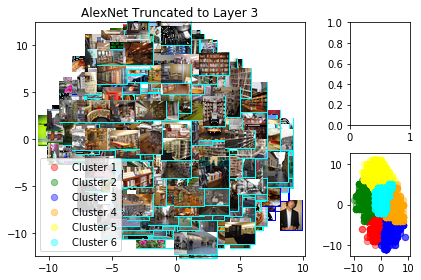

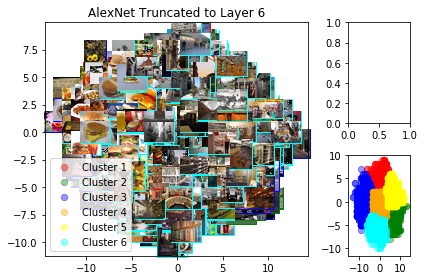

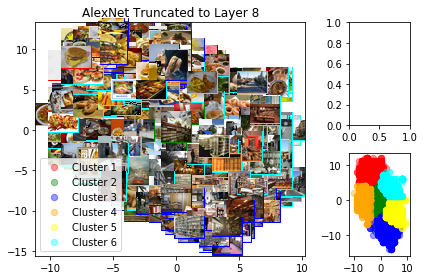

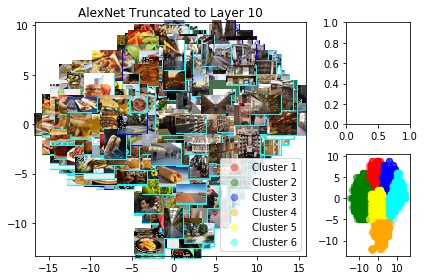

In [0]:
plotImages(3,6)
plotImages(6,6)
plotImages(8,6)
plotImages(10,6)

# Save Video

In [0]:
from PIL import Image, ImageDraw
import cv2
def saveVideo(i = 0, layerToLoad=3, clusterNum = 6, fps = 12):
  path = '/content/gdrive/My Drive/Colab Notebooks/classificationSet/output/cluster/' + str(i) + '_layer' + str(layerToLoad) + '_totClusters' + str(clusterNum) + '.txt'
  arr = np.loadtxt(path)
  x = arr[:, -1]

  videodims = (500, 334)
  fourcc = cv2.VideoWriter_fourcc(*'mp4v')    
  path = "/content/gdrive/My Drive/Colab Notebooks/classificationSet/output/movies/mov_layer" + str(layerToLoad) + '_cluster_' + str(i+1) + 'of' +str(clusterNum) +".mp4"
  video = cv2.VideoWriter(path,fourcc, fps,videodims)
  for val in x:
      imtemp = allImages[int(val)].copy().resize(videodims)
      video.write(cv2.cvtColor(np.array(imtemp), cv2.COLOR_RGB2BGR))
  video.release()
  print('done with ' + path)

In [0]:
saveVideo(i = 0, layerToLoad=3, clusterNum = 6, fps = 12)
saveVideo(i = 1, layerToLoad=3, clusterNum = 6, fps = 12)
saveVideo(i = 2, layerToLoad=3, clusterNum = 6, fps = 12)
saveVideo(i = 3, layerToLoad=3, clusterNum = 6, fps = 12)
saveVideo(i = 4, layerToLoad=3, clusterNum = 6, fps = 12)
saveVideo(i = 5, layerToLoad=3, clusterNum = 6, fps = 12)

done with /content/gdrive/My Drive/Colab Notebooks/classificationSet/output/moviesTest/mov_layer3_cluster_1of6.mp4
done with /content/gdrive/My Drive/Colab Notebooks/classificationSet/output/moviesTest/mov_layer3_cluster_2of6.mp4
done with /content/gdrive/My Drive/Colab Notebooks/classificationSet/output/moviesTest/mov_layer3_cluster_3of6.mp4
done with /content/gdrive/My Drive/Colab Notebooks/classificationSet/output/moviesTest/mov_layer3_cluster_4of6.mp4
done with /content/gdrive/My Drive/Colab Notebooks/classificationSet/output/moviesTest/mov_layer3_cluster_5of6.mp4
done with /content/gdrive/My Drive/Colab Notebooks/classificationSet/output/moviesTest/mov_layer3_cluster_6of6.mp4


In [0]:
saveVideo(i = 0, layerToLoad=6, clusterNum = 6, fps = 12)
saveVideo(i = 1, layerToLoad=6, clusterNum = 6, fps = 12)
saveVideo(i = 2, layerToLoad=6, clusterNum = 6, fps = 12)
saveVideo(i = 3, layerToLoad=6, clusterNum = 6, fps = 12)
saveVideo(i = 4, layerToLoad=6, clusterNum = 6, fps = 12)
saveVideo(i = 5, layerToLoad=6, clusterNum = 6, fps = 12)

done
done
done
done
done
done


In [0]:
saveVideo(i = 0, layerToLoad=8, clusterNum = 6, fps = 12)
saveVideo(i = 1, layerToLoad=8, clusterNum = 6, fps = 12)
saveVideo(i = 2, layerToLoad=8, clusterNum = 6, fps = 12)
saveVideo(i = 3, layerToLoad=8, clusterNum = 6, fps = 12)
saveVideo(i = 4, layerToLoad=8, clusterNum = 6, fps = 12)
saveVideo(i = 5, layerToLoad=8, clusterNum = 6, fps = 12)

done
done
done
done
done
done


In [0]:
saveVideo(i = 0, layerToLoad=10, clusterNum = 6, fps = 12)
saveVideo(i = 1, layerToLoad=10, clusterNum = 6, fps = 12)
saveVideo(i = 2, layerToLoad=10, clusterNum = 6, fps = 12)
saveVideo(i = 3, layerToLoad=10, clusterNum = 6, fps = 12)
saveVideo(i = 4, layerToLoad=10, clusterNum = 6, fps = 12)
saveVideo(i = 5, layerToLoad=10, clusterNum = 6, fps = 12)

done
done
done
done
done
done
